In [1]:
import math as m
import matplotlib.pyplot as plt

In [2]:
S0 = 9
K = 10
T = 3
r = 0.06
sigma = 0.3

alpha = r - sigma**2/2

Ms = [1,5,10,20,50,100,200]


In [3]:
def fun_u(sigma,alpha,dt):
    return m.exp(sigma*m.sqrt(dt) + alpha*dt)
def fun_d(sigma,alpha,dt):
    return m.exp(-1*sigma*m.sqrt(dt) + alpha*dt)
def fun_p(u,d,dt,r):
    return (m.exp(r*dt) - d)/(u-d)
def combination(n,i):
    return m.factorial(n)/(m.factorial(n-i)*m.factorial(i))

### We also need to check arbitrage condition for that we have to see that 'p' is a valid probability ie 0 <= p <= 1 for that we have to have 
## <b> 0<= (R-d)/(u-d) <=1 or d<R<u</b>

In [22]:
#call option
for M in Ms:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    if(p >= 1 or p<0):
        print("arbitrage exists")
        continue
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(S0 * u**(M-i) * d**i-K,0)
        
    C = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        C += Val[i] *p_star
    C = C/(m.exp(r*T))
    print(f'Value of call option for M = {M}  is {C}')

Value of call option for M = 1  is 2.405371888328072
Value of call option for M = 5  is 2.169396202324439
Value of call option for M = 10  is 2.1177567446693577
Value of call option for M = 20  is 2.1260189044358127
Value of call option for M = 50  is 2.1257832976133915
Value of call option for M = 100  is 2.1229497842829432
Value of call option for M = 200  is 2.119850759749658


In [24]:
#put option
for M in Ms:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    if(p >= 1 or p<0):
        print("arbitrage exists for M = {M}")
        continue
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(K - S0 * u**(M-i) * d**i,0)
        
    P = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        P += Val[i] *p_star
    P = P/m.exp(r*T)
    print(f'Value of put option for M = {M} is {P}')

Value of put option for M = 1 is 1.8598554962991374
Value of put option for M = 5 is 1.543635235302061
Value of put option for M = 10 is 1.4813095477175118
Value of put option for M = 20 is 1.484167308526397
Value of put option for M = 50 is 1.4806690053130285
Value of put option for M = 100 is 1.4767445457201847
Value of put option for M = 200 is 1.473099410559442


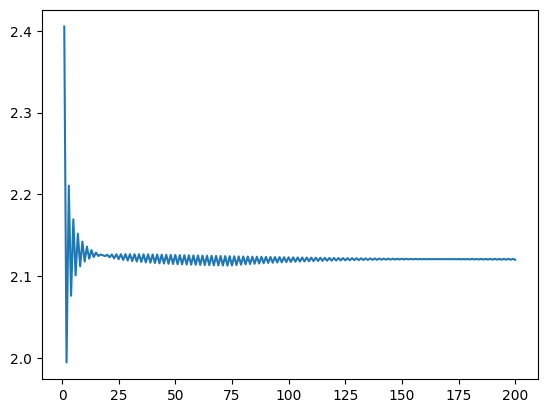

In [27]:
#varying in steps of 1
Mss = [i for i in range(1,201)]

Cs = []
for M in Mss:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(S0 * u**(M-i) * d**i-K,0)
        
    C = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        C += Val[i] *p_star
    Cs.append(C/m.exp(r*T))

plt.plot(Mss,Cs)

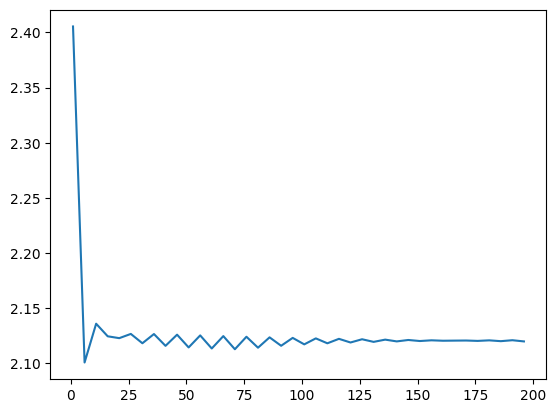

In [7]:
#varying in steps of 5
Mss = [i for i in range(1,201,5)]

Cs = []
for M in Mss:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(S0 * u**(M-i) * d**i-K,0)
        
    C = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        C += Val[i] *p_star
    Cs.append(C/m.exp(r*T))

plt.plot(Mss,Cs)

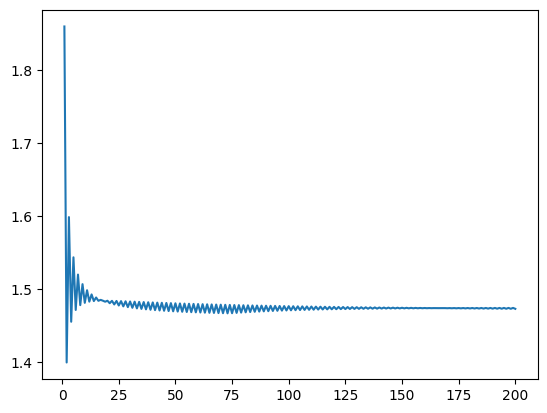

In [8]:
#for put option
#varying in steps of 1
Mss = [i for i in range(1,201)]

Cs = []
for M in Mss:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(K -S0 * u**(M-i) * d**i,0)
        
    P = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        P += Val[i] *p_star
    Cs.append(P/m.exp(r*T))

plt.plot(Mss,Cs)

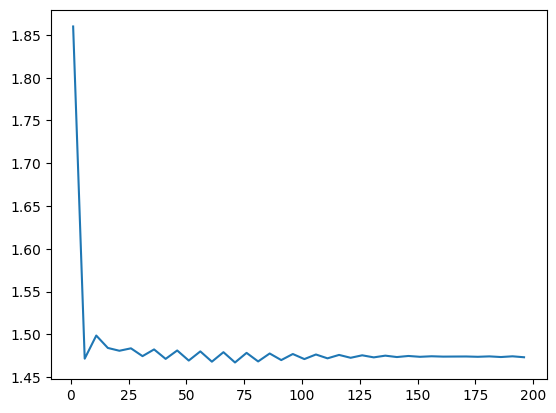

In [9]:
#for put option
#varying in steps of 5
Mss = [i for i in range(1,201,5)]

Cs = []
for M in Mss:
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(K -S0 * u**(M-i) * d**i,0)
        
    P = 0
    for i in range(M+1):
        p_star = combination(M,i)*p**i*(1-p)**(M-i)
        P += Val[i] *p_star
    Cs.append(P/m.exp(r*T))

plt.plot(Mss,Cs)

## The value of both the call and put option converges as M increases. Increasing the number of time steps the jump in the option value decreases and we can see an almost straight line...


In [10]:
def call_pricing(M):
    out = []
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Mc = M
    # print(p,u,d)
    if(p >= 1 or p<0):
        print("arbitrage exists")
        return;
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(S0 * u**(M-i) * d**i -K,0)
    # print(Val)
    out.append(Val)
    while(M>0):
        C = [0 for i in range(M)]
        for i in range(M):
#             p_star = combination(M,i)
            up = p*Val[i]
            down = (1-p)*Val[i+1]
            C[i] = (up + down)/m.exp(r*T/Mc)
        M = M-1
        out.append(C)
        Val = C
        
    return out

In [11]:
out_call = call_pricing(20)
out_call.reverse()

In [12]:
out_call[0]

[2.129583314766061]

In [13]:
time_periods = [0,0.3,0.75,1.5,2.7] 

## We have 'out' containing all values of call/put value and we have to output at a specific time. We have T = 3 and 20 steps which makes each time step of 3/20 = 0.15 units. so t = 0.3 is in terms of indexes 0.30/0.15 = 2 So we have to output that value from out.

In [14]:
for t in time_periods:
    index = int(t/0.15)
    print(f'The value of the call option at time t = {t} is {out_call[index]}\n')

The value of the call option at time t = 0 is [2.129583314766061]

The value of the call option at time t = 0.3 is [3.724750235707294, 1.999167982432596, 0.949239086415339]

The value of the call option at time t = 0.75 is [7.740656260256305, 4.675176543106657, 2.544298432263111, 1.2110272575726366, 0.487726008491381, 0.15996338751079023]

The value of the call option at time t = 1.5 is [20.279588254508923, 14.186522082155008, 9.39365148133607, 5.717012493484311, 3.0717585775266225, 1.3855322898011047, 0.49339033481109573, 0.1279314329851842, 0.02122404514381468, 0.001677434135834096, 0.0]

The value of the call option at time t = 2.7 is [66.05705717623755, 50.3232856298517, 37.85198000742857, 27.966653817878665, 20.13109298468865, 13.92026975100263, 8.997287712920532, 5.095107400360669, 2.145848531734512, 0.4609991457290626, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



In [15]:
def put_pricing(M):
    out = []
    u = fun_u(sigma,alpha,T/M)
    d = fun_d(sigma,alpha,T/M)
    p = fun_p(u,d,T/M,r)
    Mc = M
    # print(p,u,d)
    if(p >= 1 or p<0):
        print("arbitrage exists")
        return;
    Val = [0 for i in range(M+1)]
    for i in range(M+1):
        Val[i] = max(K - S0 * u**(M-i) * d**i ,0)
    # print(Val)
    out.append(Val)
    while(M>0):
        C = [0 for i in range(M)]
        for i in range(M):
#             p_star = combination(M,i)
            up = p*Val[i]
            down = (1-p)*Val[i+1]
            C[i] = (up + down)/m.exp(r*T/Mc)
        M = M-1
        out.append(C)
        Val = C
        
    return out

In [16]:
out_put = put_pricing(20)
out_put.reverse()

In [17]:
for t in time_periods:
    index = int(t/0.15)
    print(f'The value of the call option at time t = {t} is {out_put[index]}\n')

The value of the call option at time t = 0 is [1.48228542887877]

The value of the call option at time t = 0.3 is [0.8235723721977711, 1.4629887659935037, 2.287665767060579]

The value of the call option at time t = 0.75 is [0.20620199589611496, 0.5147120451344807, 1.0582122560747276, 1.8447754327740957, 2.8017516675213523, 3.805853690025756]

The value of the call option at time t = 1.5 is [0.000522104047223112, 0.0074844906852878715, 0.04977501067043518, 0.20570546705070747, 0.5983210610998178, 1.320048835033366, 2.336561199776601, 3.4839888476743135, 4.576464407038671, 5.507444946352513, 6.2591987260312365]

The value of the call option at time t = 2.7 is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14378739356617004, 0.9106276819894084, 2.3929496993391832, 3.933314771745875, 5.154278450508743, 6.122070003019721, 6.889185770182125, 7.497236748414328, 7.979205713146696, 8.361236317949835, 8.664051216181504]

